In [2]:
# import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
# load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


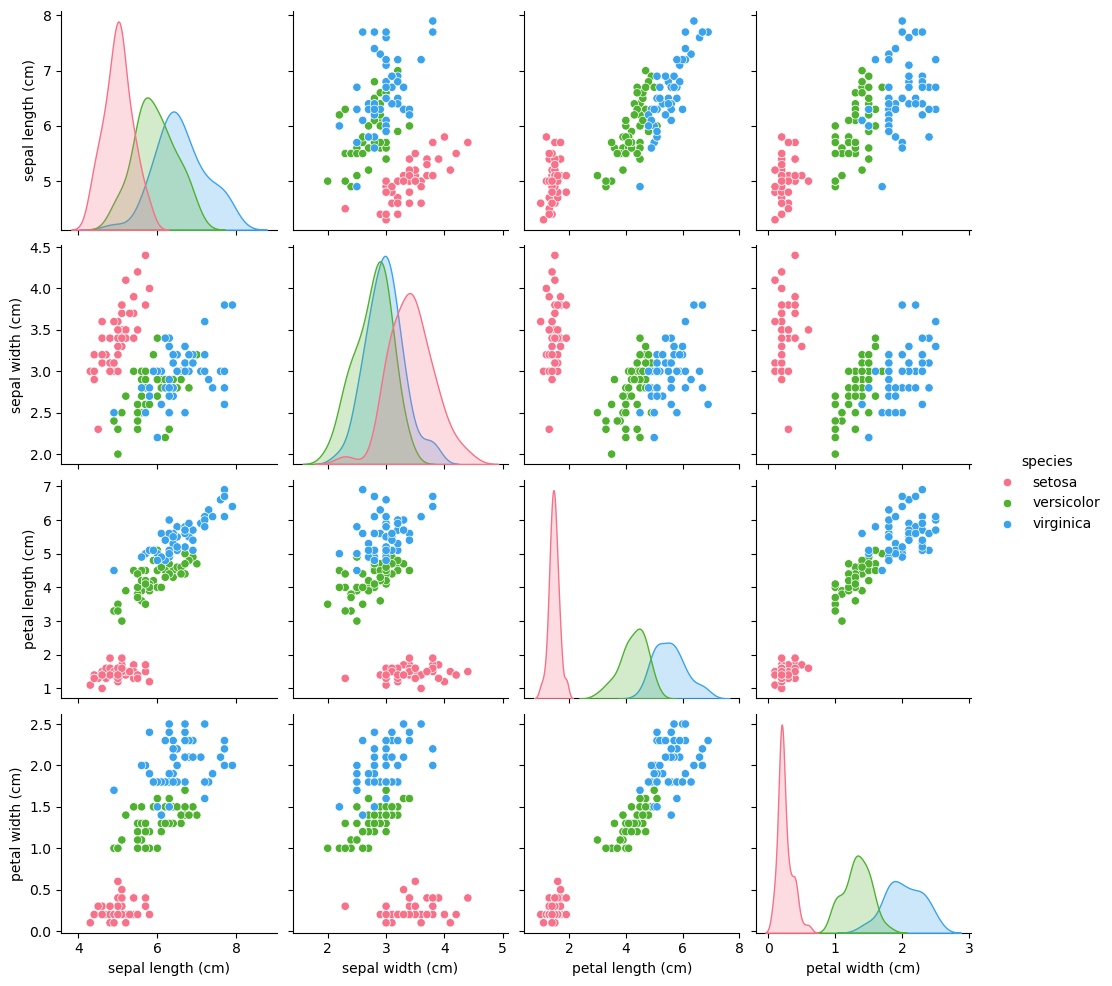

In [4]:
# seaborn pairplot to help identify which features (like petal length vs. petal width) make the classes linearly separable
sns.pairplot(df,hue='species',palette='husl')
plt.show()

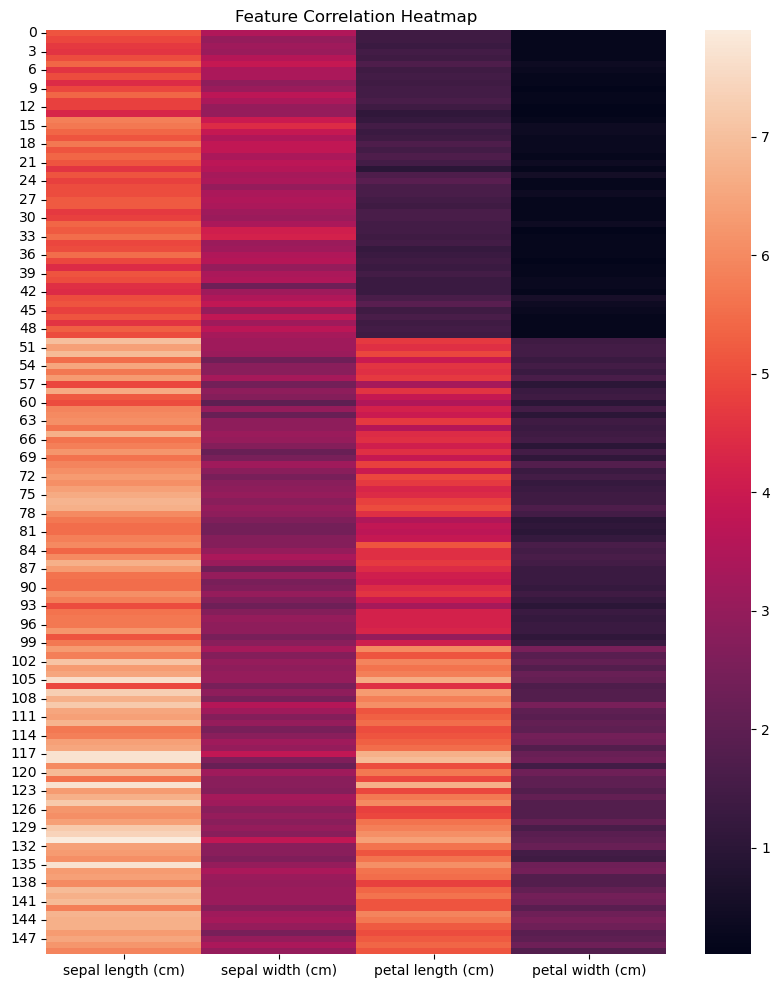

In [5]:
# correlation heatmap to check for multicollinearity (features that are too similar)
# seaborn heatmap to show the correlation coefficients between variables.
plt.figure(figsize=(10,12))
sns.heatmap(df.drop('species',axis=1))
plt.title("Feature Correlation Heatmap")
plt.show()

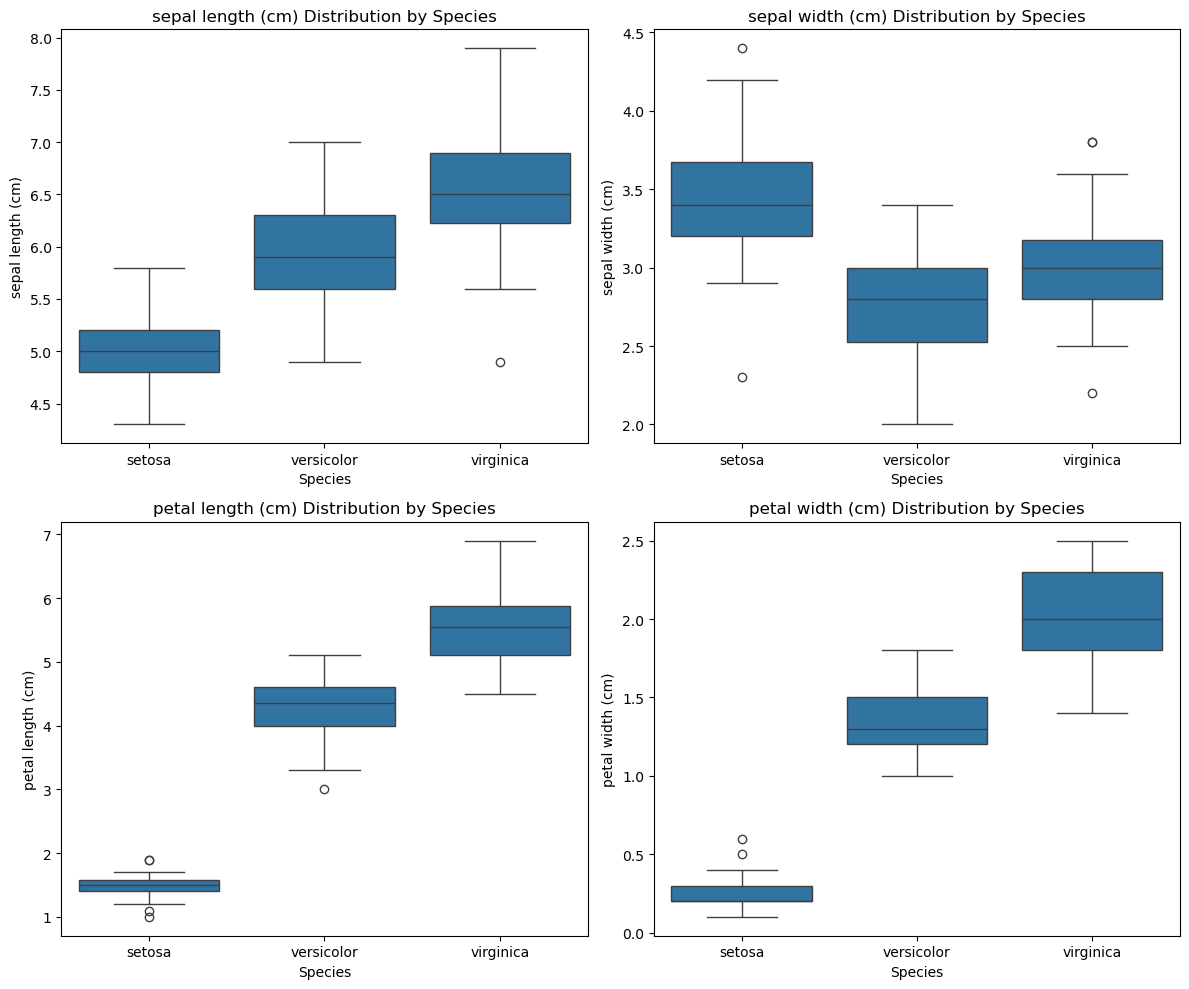

In [6]:
# box plots to visualize the distribution and spread of each feature across the three species
# define the list of feature columns to plot
features  = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
fig, axes = plt.subplots(2,2,figsize=(12,10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(ax=axes[i], x='species', y=feature, data=df)
    axes[i].set_title(f"{feature} Distribution by Species")
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [7]:
# load the dataset as (X,y) arrays
X,y = load_iris(return_X_y=True)

In [9]:
# train and test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# create and fit the model
model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
# predictions
print("Predictions:", model.predict(X_test))
print("Original:", y_test)

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Original: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [12]:
# model's score and accuracy
print(f"Accuracy: {model.score(X_test,y_test) * 100:.2f}%")

Accuracy: 100.00%


In [13]:
# confusion matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(95.72222222222221, 0.5, 'True')

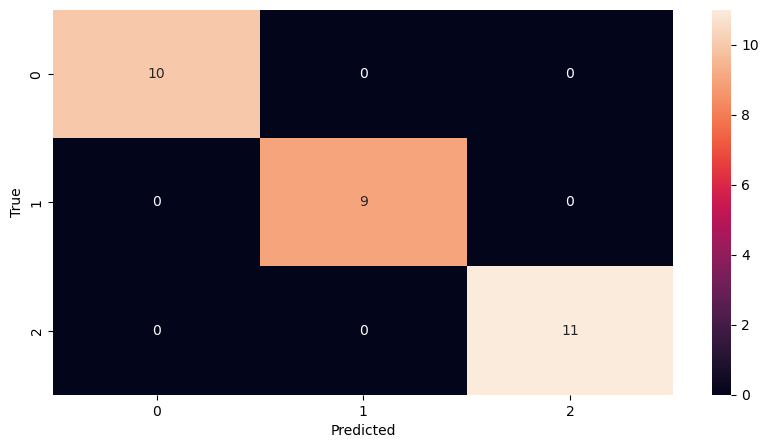

In [14]:
# confusion matrix heat
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")